# Proyecto – Entrega 2

## Integrantes:

- Jorge

- Christopher Zuñiga Rojas C28730

- Jesús Alonso Porras Arguedas C26007

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

covid_data = pd.read_csv('../databases/covid-vaccination-vs-death_ratio.csv')
world_countries = pd.read_csv('../databases/countries of the world.csv')
air_pol_countries = pd.read_csv('../databases/global_air_pollution_data.csv')
world_income = pd.read_csv("../databases/country_codes.csv")

In [51]:
# Clean the data
covid_data = covid_data.dropna()
world_countries = world_countries.dropna()
air_pol_countries = air_pol_countries.dropna()
world_income = world_income.dropna()

# Clean World countries data to delete the columns that are not needed
colums_to_delete_world = ['Population', 'Area (sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Agriculture', 'Industry', 'Service']
world_countries = world_countries.drop(colums_to_delete_world, axis=1)

# Clean air por countries data to delete the columns that are not needed
colums_to_delete_air_world = ['co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value', 'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category', 'pm2.5_aqi_value', 'pm2.5_aqi_category']
air_pol_countries = air_pol_countries.drop(colums_to_delete_air_world, axis=1)

# Remove commas and convert to float
world_countries['Pop. Density (per sq. mi.)'] = world_countries['Pop. Density (per sq. mi.)'].str.replace(',', '').astype(float)
world_countries['Deathrate'] = world_countries['Deathrate'].str.replace(',', '.').astype(float)

# Ordenar los datos por año de forma descendiente
air_pol_countries = air_pol_countries.sort_values(by='aqi_value', ascending=False)

# Eliminar filas manteniendo solo el más reciente
air_pol_countries = air_pol_countries.rename(columns={'country_name': 'Country'}) # Rename column to match the other data
air_pol_countries = air_pol_countries.drop_duplicates(subset=['Country'], keep='first')
air_pol_countries = air_pol_countries.drop('city_name', axis=1)

# Clean Covid data to delete the iso code
covid_data = covid_data.rename(columns={'iso_code': 'country_code'})
covid_data = pd.merge(covid_data, world_income, on='country_code')
covid_data = covid_data.drop('country_code', axis=1)
covid_data = covid_data.dropna()

# Resetear para que quede ordenado
air_pol_countries.reset_index(drop=True, inplace=True)


In [52]:
# Sort and match values of the data
covid_data = covid_data.sort_values(by='country') # Sort covid_data by country
world_countries = world_countries.sort_values(by='Country') # Sort world_countries by country

In [53]:
# 5. Seleccionar variables de interés (por lo menos 5), modificar los nombres de las variables

covid_data = covid_data.rename(columns={'country': 'Country'}) # Rename column to match the other data
world_countries = world_countries.rename(columns={'Pop. Density (per sq. mi.)': 'Pop. Density', 'GDP ($ per capita)': 'GDP'}) # Rename column to match the other data
air_pol_countries['Country'] = air_pol_countries['Country'].str.strip()
world_countries['Country'] = world_countries['Country'].str.strip()  # Remove white spaces from the country names for it to match
world_countries['Region'] = world_countries['Region'].str.strip()  # Remove white spaces from the region names for it to match

# Variables of interest: total_vaccinations, people_vaccinated, people_fully_vaccinated, New_deaths, ratio, GDP, death_rate, Pop. Density.

In [54]:
# Merge the data by countries in order to have regions and countries in the same dataframe
merged_data = pd.merge(covid_data, world_countries, on='Country')
merged_data = pd.merge(merged_data, air_pol_countries, on='Country')
print(merged_data.head(10)) # Print the first 10 rows of the merged data to show the result of the merge

merged_data = merged_data.dropna()

   Unnamed: 0      Country        date  total_vaccinations  people_vaccinated  \
0           0  Afghanistan  2021-05-11            504502.0           448878.0   
1          20  Afghanistan  2022-01-11           4925111.0          4378818.0   
2          21  Afghanistan  2022-01-13           4954809.0          4405897.0   
3          22  Afghanistan  2022-01-17           4985047.0          4432926.0   
4          23  Afghanistan  2022-01-19           5004050.0          4450211.0   
5          24  Afghanistan  2022-01-24           5046054.0          4486527.0   
6          25  Afghanistan  2022-01-26           5074196.0          4511372.0   
7          26  Afghanistan  2022-01-27           5081064.0          4517380.0   
8          27  Afghanistan  2022-01-31           5125146.0          4554648.0   
9          29  Afghanistan  2022-02-07           5216998.0          4634282.0   

   people_fully_vaccinated  New_deaths  population      ratio      region  \
0                  55624.0     

In [55]:
# 4. Realizar visualizaciones iniciales

print(merged_data.iloc[0]) # Print the first row of the merged data to show the result of the merge and explain the columns
print(merged_data.head(10)) # Print the first 10 rows of the merged data to show the result of the merge
# Country: Name of the country
# Date: Date of the data
# Total_vaccinations: Total number of cases of covid-19 in the country to date
# People_vaccinated: Number of people vaccinated in the country to date
# People_fully_vaccinated: Number of people with all the vaccines in the country to date
# New_deaths: Number of new deaths because of covid in the country that date
# population: Population of the country
# Ratio: Ratio of people vaccinated to people dead in the country
# Region: Region of the country
# GDP: GDP of the country
# Pop. Density: Population density of the country
# Deathrate: Deathrate of the country

Unnamed: 0                                    0
Country                             Afghanistan
date                                 2021-05-11
total_vaccinations                     504502.0
people_vaccinated                      448878.0
people_fully_vaccinated                 55624.0
New_deaths                                   12
population                           40374668.0
ratio                                  1.111781
region                               South Asia
income_group                         Low income
Region                     ASIA (EX. NEAR EAST)
Pop. Density                              480.0
GDP                                       700.0
Literacy (%)                               36,0
Deathrate                                 20.34
aqi_value                                   198
aqi_category                          Unhealthy
Name: 0, dtype: object
   Unnamed: 0      Country        date  total_vaccinations  people_vaccinated  \
0           0  Afghanistan  2021

In [56]:
# Separate latam countries and export the data
#latam_countries = merged_data[merged_data['Region'] == 'LATIN AMER. & CARIB']
#latam_countries.to_csv('latamCountriesVaccine.csv', index=False)


In [79]:
# Filter the data for the desired years
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['year'] = merged_data['date'].dt.year
filtered_data2020 = merged_data[merged_data['year'] == 2020]
filtered_data2021 = merged_data[merged_data['year'] == 2021]
filtered_data2022 = merged_data[merged_data['year'] == 2022]

Index(['Unnamed: 0', 'Country', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'New_deaths',
       'population', 'ratio', 'region', 'income_group', 'Region',
       'Pop. Density', 'GDP', 'Literacy (%)', 'Deathrate', 'aqi_value',
       'aqi_category', 'year'],
      dtype='object')


### 1. Añadir y combinar nuevas bases de datos

Para esta entrega, con5núe trabajando con la misma base de datos que la entrega
anterior e incluya más bases de datos para enriquecer la can5dad de datos. Procure que
las nuevas bases de datos puedan ser unificadas a las anteriores por medio de alguna
columna en común (como en los labs 3-4). En caso de no ser relevante, muestre con
código Python cómo haría para unir dos bases de datos (aunque no las u5lice).

Se incluyeron dos bases de datos y se incorporó otras variables, como el de la educación,
de las bases de datos que ya teníamos.

Las bases incorporadas añaden los parámetros:

1. Grupo de nivel de ingreso: una categoría para el nivel de ingreso de un país
2. Categoría en el Índice de Calidad de Aire (AQI por sus siglas en inglés): categoriza los países
del mundo basándose en el índice AQI para colocarlo en una categoría que indica la calidad del aire.

https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data?resource=download
https://www.kaggle.com/datasets/willianoliveiragibin/world-gdp-by-country-region-and-income-group

### 2. Realizar preguntas

Realice una lista de las preguntas que guían su análisis. Pueden ser algunas de las
mismas anteriores y otras nuevas. Algunas preguntas deben buscar predecir una variable
en función de una combinación de 2 o más variables (ver punto 4). Por ejemplo, la
pregunta “si el día está soleado y es viernes de quincena, hay mayor compra de helados?”
buscaría predecir una variable en función a dos variables. Otras preguntas deben buscar
comparar entre dis5ntas categorías de datos, como por ejemplo en los labs 3-4, se
inves5gó si exisZan diferencias entre países en varios grupos de la6tud y varios grupos de
al6tud.

Deben haber por lo menos:
- tres preguntas que comparen categorías
- dos preguntas que combinen variables

#### Preguntas

- Si la educación y el PIB es alto, ¿hay menor cantidad de muertes por covid(porcentaje)?
- Si la población y su densidad es salta, ¿hay mayor cantidad de muertes por covid (porcentaje)?
- ¿Existen diferencias en el número de muertes por covid(porcentaje) si se divide por la categoría de calidad del aire(aqi_category)?
- ¿Afecta el grupo de ingreso al que pertenece un país (income_group) a las muertes con respecto a la población?
- ¿Hubo diferencias regionales en qué tantas muertes por covid había en los respectivos países?

### 3. Gráficos de dispersión y de cajas (2)

U5lice gráficas de dispersión para describir las distribuciones y diagramas de cajas para
las relaciones entre las variables de interés. Describa las distribuciones de todas las
variables de interés (mínimo 5 variables) y comente sobre su distribución. Para las
relaciones, solamente enfoque las que sean más significa5vas (3 o más relaciones, que se
relacionen con alguna pregunta).

Variables de interés:

- Educación (%literacy)
- PIB (GDP)
- Poblablación
- Densidad poblacional
- Ratio: proporción de muertes por covid en comparación con nuevos casos.

Relaciones de interés:

- Densidad poblacional y PIB: ¿si hay más recursos humanos, será mayor el PIB?
- Ratio y educación: si afecta la educación en las muertes
- Ratio y PIB: si afectó los recursos del país en las muertes

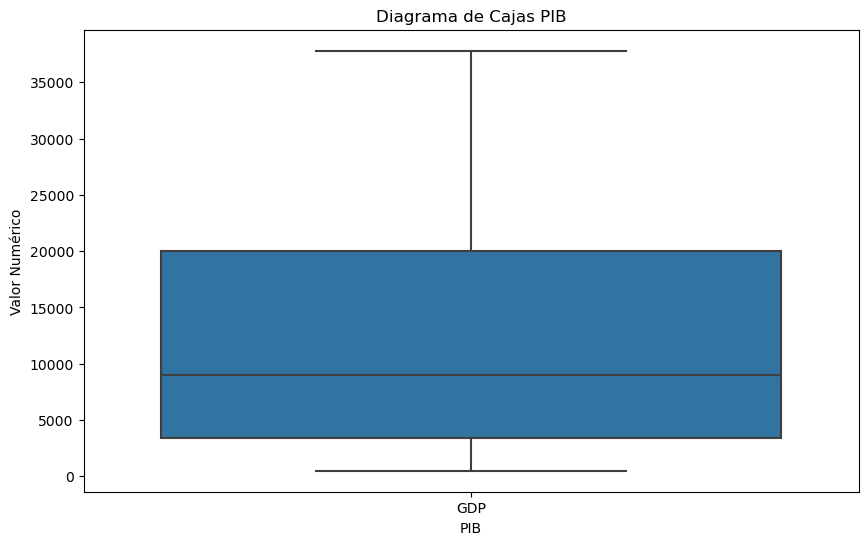

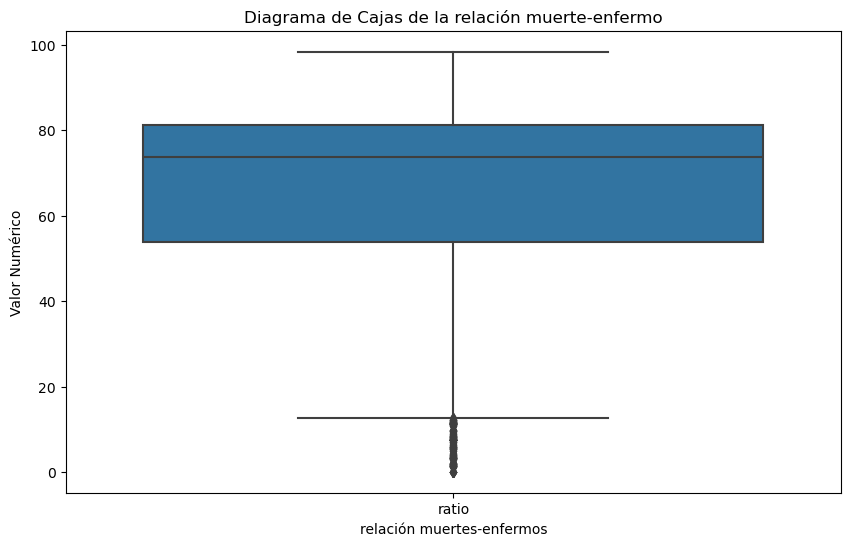

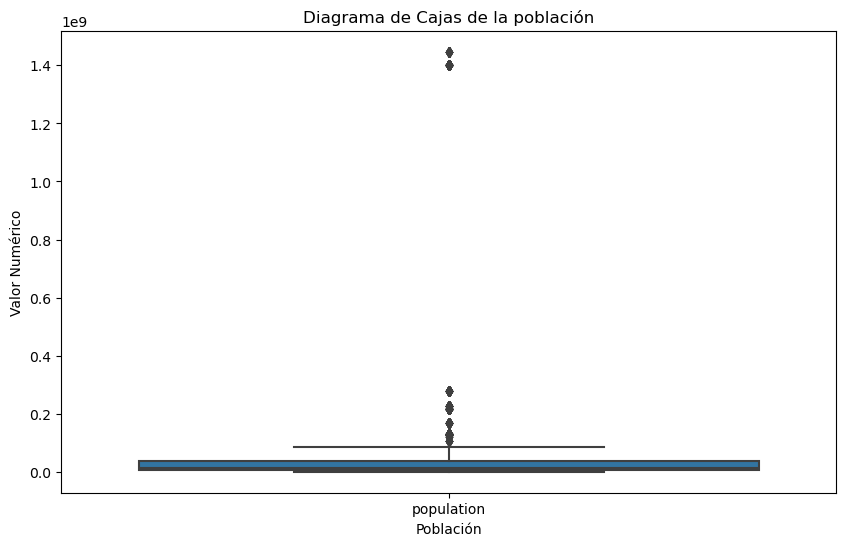

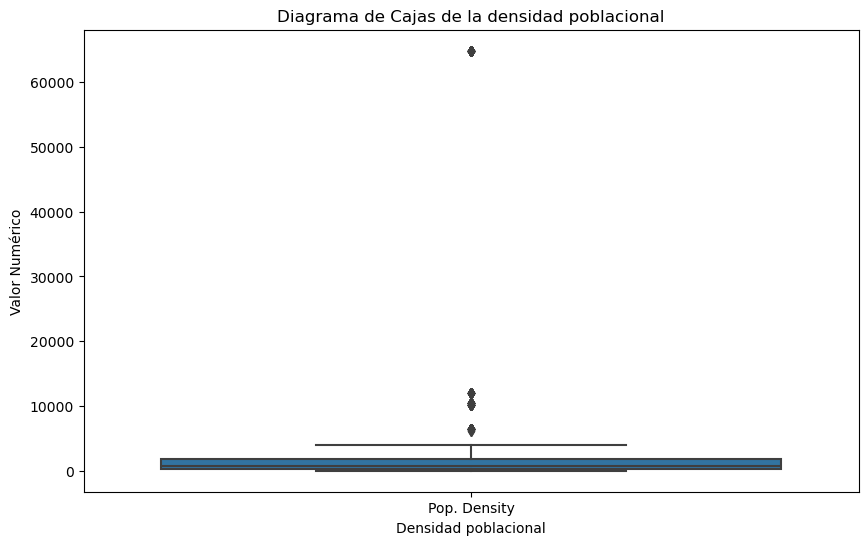

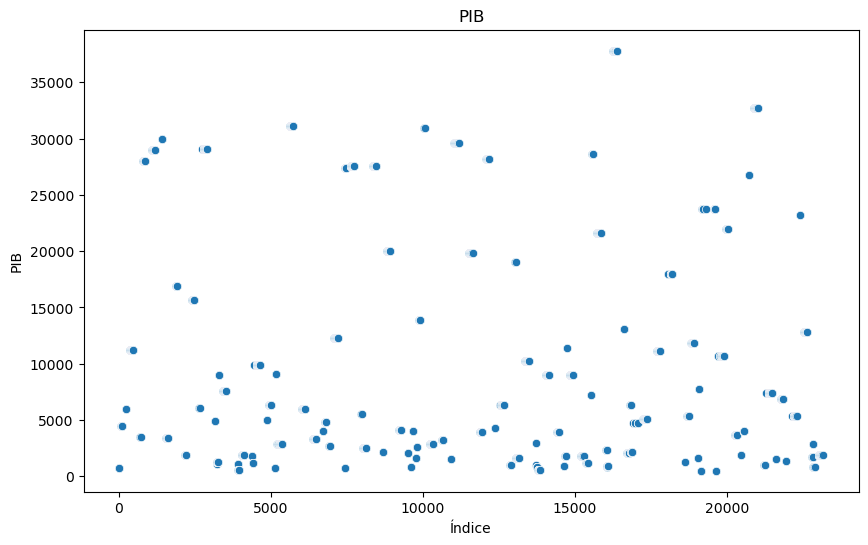

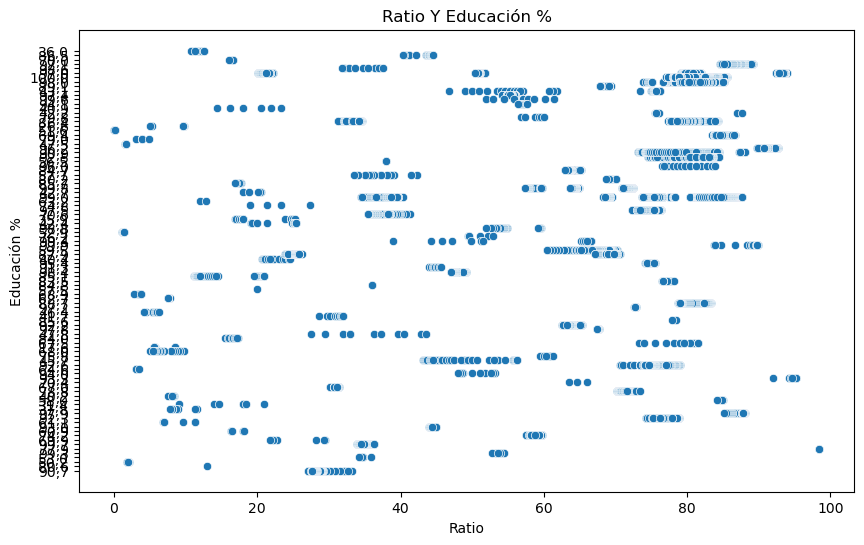

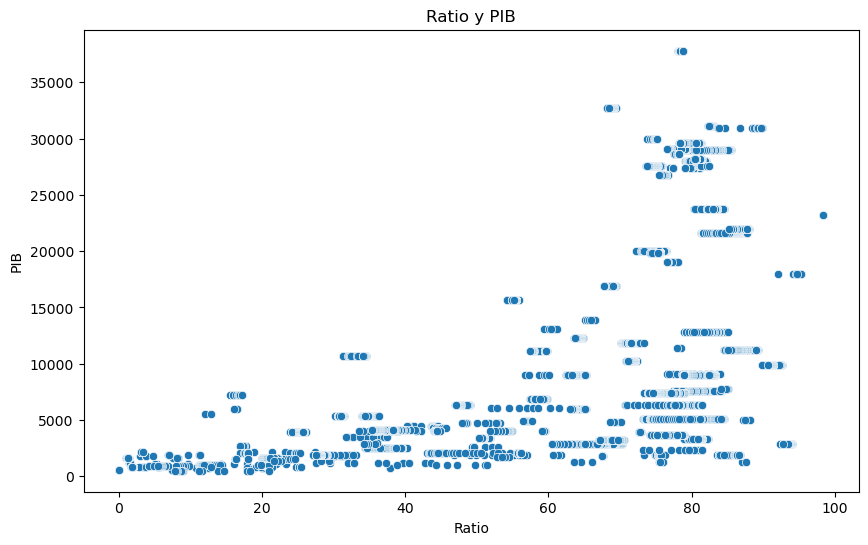

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# plt.figure(figsize=(6, 3))
# sns.boxplot(x=filtered_data2022['Literacy (%)'])
# plt.title('Diagrama de Cajas de educación')
# plt.xlabel('Educación')
# plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data2022[['GDP']])
plt.title('Diagrama de Cajas PIB')
plt.xlabel('PIB')
plt.ylabel('Valor Numérico')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data2022[['ratio']])
plt.title('Diagrama de Cajas de la relación muerte-enfermo')
plt.xlabel('relación muertes-enfermos')
plt.ylabel('Valor Numérico')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data2022[['population']])
plt.title('Diagrama de Cajas de la población')
plt.xlabel('Población')
plt.ylabel('Valor Numérico')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data2022[['Pop. Density']])
plt.title('Diagrama de Cajas de la densidad poblacional')
plt.xlabel('Densidad poblacional')
plt.ylabel('Valor Numérico')
plt.show()


# Gráficos de Dispersión

# Gráfico 1: Variable X vs Variable Z
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data2022.index, y='GDP', data=filtered_data2022)
plt.title('PIB')
plt.xlabel('Índice')
plt.ylabel('PIB')
plt.show()

# Gráfico 1: Variable X vs Variable Z
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratio', y='Literacy (%)', data=filtered_data2022)
plt.title('Ratio Y Educación %')
plt.xlabel('Ratio')
plt.ylabel('Educación %')
plt.show()

# Gráfico 1: Variable X vs Variable Z
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratio', y='GDP', data=filtered_data2022)
plt.title('Ratio y PIB')
plt.xlabel('Ratio')
plt.ylabel('PIB')
plt.show()


#### Obserbaciones de las relaciones:

El primer gráfico muestra que no parece haber relación entre la densidad poblacional y el PIB.

El segundo gráfico nos muestra que no hay relación alguna entre la educación de un país y
su desempeño en la pandemia. Todos los países en los diferentes niveles educativos fueron
afectados de forma muy distribuida.

El tercer gráfico sugiere una correlación positiva entre las muertes en los países y el PIB.
Esto muestra algo interesante que analizar.

### 4 y 5. Predicciones con regresión lineal

Para estudiar si 2 o más variables pueden predecir otra variable u5lice la regresión lineal
múl5ple (regresión lineal). Esto implica usar la forma ... .
Por ejemplo, en el lab 3-4, se puede predecir la esperanza de vida con base en la
combinación de las variables la5tud y al5tud (en lugar de tratar ambos casos por aparte).
Describa tres preguntas que desea resolver de esta manera y, para cada una, las variables
que considera u5lizar para generar las predicciones y las variables que se busca predecir.

https://www.youtube.com/watch?v=ZmNDRnmYaPc. Implemente las operaciones paso a
paso sin u5lizar bibliotecas especializadas de Python. Solamente para manipulación de
matrices.

In [ ]:
#

### 6. Coeficiente de la regresión lineal múltiple y error de predicción

Además de obtener los coeficientes de la regresión lineal múl5ple, indique también el
error de predicción para este modelo y el conjunto de datos estudiado, obtenga el
coeficiente de determinación múl5ple y el coeficiente ajustado de determinación múl5ple
(ver referencia).

Regresión lineal múl.ple:
https://www.youtube.com/watch?v=ZmNDRnmYaPc

In [ ]:
#

### 7. Haga 3 predicciones utilizando el modelo (4-6)

Invente 3 datos nuevos para intentar, con valores para las variables X usadas en la
predicción pero no para la variable Y. Por ejemplo, para el lab 3-4, se puede crear los datos
de la5tud 9.6516711629073 y al5tud de 0 msnv, que corresponden a Puerto Viejo de
Limón. La idea es obtener una predicción de la variable Y. En el ejemplo, la idea sería
predecir la esperanza de vida a par5r de la al5tud y la5tud. Obtenga el valor de la variable
pronos5cado por la combinación lineal para los 3 datos. Esto podría dar una predicción
valiosa o no, lo cual depende de la capacidad predic5va del modelo. Explique y jus5fique si
le parecen predicción valiosas o no. ¿Cómo podría mejorarse?

In [ ]:
#

### 8. Cree otro modelo y comparelo con el anterior (4-6)

Pruebe otra combinación de variables para predecir la variable de interés. Si usó
solamente 2 variables, pruebe añadir otra variable o si usó más de 2 variables, intente
eliminar la variable que considera que contribuye menos en el modelo. Obtenga los
coeficientes para este nuevo modelo, así como el error de predicción y el coeficiente
ajustado de determinación múl5ple. Compare entre este modelo y el anterior y explique
cuál de los dos modelos es mejor y de qué forma. Busque en internet cómo saber si un
modelo es mejor que otro para fundamentar su respuesta.

In [ ]:
#

### 9. Dividir los datos en grupos para responder las preguntas

A par5r del conjunto de datos, separe la población en varios grupos que desee
comparar, similar a lo realizado en el laboratorio 4, para las diferentes la5tudes o al5tudes.
Para cada pregunta de inves5gación (por lo menos 3 preguntas), plantee por lo menos 2 ó
3 grupos dis5ntos, dependiendo de lo que tenga mayor sen5do. 

In [ ]:
#

### 10. Diagramas de cajas de los grupos (9)

U5lice diagramas de cajas para estudiar la distribución de cada uno de los grupos de
análisis. Al igual que en el lab 4, grafique las distribuciones de cada grupo, uno a la par del
otro.

In [ ]:
#

### 11. Análisis de varianza de los grupos (9)

Al igual que en el lab 4, realice análisis de varianza para comparar las medias de los
grupos y poder contestar a las preguntas inves5gadas. ¿Provienen los grupos de la misma
distribución o de distribuciones dis5ntas? Concluya respondiendo a estas preguntas. 

In [ ]:
#